## 신경망 개요
# 텐서플로(Tensorflow) 개요

### 텐서플로 설치
- 아나콘다 프롬프트를 실행 (에러 발생시 관리자 권한으로 실행)
- 아래 명령으로 1.12.0 버전 설치
> pip install tensorflow==1.12.0
- 필요시, 아래 명령으로 pip 업그레이드 후 텐서플로 설치
> python -m pip install --upgrade pip

In [1]:
import tensorflow as tf

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.__version__

'1.12.0'

### 텐서플로 실행 방식
<img src="https://www.i2tutorials.com/wp-content/uploads/2019/09/computational-graph-in-TensorFlow-1-i2tutorials.png" />
(출처: https://www.i2tutorials.com/how-do-you-build-computational-graph-in-tensorflow/)

- 텐서플로는 위의 그림과 같이 **계산 그래프**(computation graph) 방식을 사용한다
- 먼저 그래프를 만들고(**구성 단계**) 이 그래프를 실행한다(**실행 단계**)
- 그래프는 **노드**(node) 와 **엣지**(edge) 로 구성된다
- 노드는 위 그림에서 네모나 동그라미로 표시되며, 상수나 변수, 연산에 해당한다 (tf.Operation)
- 엣지는 화살표로 표시되며, 처리된 값을 의미한다 (tf.Tensor)

### 텐서 정의
- 상수(tf.constant)
- 변수(tf.Variable)
- 플레이스홀더(tf.placeholder)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### tf.constant()

In [5]:
a = tf.constant(2)
b = tf.constant(3)

a, b

(<tf.Tensor 'Const:0' shape=() dtype=int32>,
 <tf.Tensor 'Const_1:0' shape=() dtype=int32>)

In [6]:
c = a*b
c

<tf.Tensor 'mul:0' shape=() dtype=int32>

- 상수의 타입이 tf.Tensor 즉 텐서임에 주목하자
- 상수들을 만들고 실행하더라도 연산이 실행되지 않는다
- 위 코드는 단지 계산 그래프를 만들 뿐이다
- 실제 값으로 출력하려면 세션(tf.Session) 을 이용해 실행단계를 거쳐야 한다

In [10]:
sess = tf.Session()
sess.run(c)

6

In [11]:
sess.run([a,b,c])

[2, 3, 6]

In [12]:
type(sess.run([a,b,c]))

list

In [9]:
sess.close()

### tf.Variable()

In [11]:
a = tf.constant(2)
b = tf.Variable(3)

a,b

(<tf.Tensor 'Const_3:0' shape=() dtype=int32>,
 <tf.Variable 'Variable_1:0' shape=() dtype=int32_ref>)

In [12]:
c = a*b
c

<tf.Tensor 'mul_2:0' shape=() dtype=int32>

In [13]:
sess = tf.Session()
sess.run(b.initializer) # 변수는 초기화 필수!
sess.run(c)

6

In [14]:
sess.run([a,b,c])

[2, 3, 6]

In [15]:
sess.close()

- 변수는 tf.Variable 타입이다 (텐서의 일종임)
- 변수는 반드시 실행하기 전에 반드시 초기화해야 한다 (b.initializer)
- 상수와 다르게 변수는 값을 재할당할 수 있다

### tf.placeholder()

In [13]:
a = tf.constant(2)
b = tf.placeholder(tf.int32)

a, b

(<tf.Tensor 'Const_2:0' shape=() dtype=int32>,
 <tf.Tensor 'Placeholder:0' shape=<unknown> dtype=int32>)

In [14]:
c = a*b
c

<tf.Tensor 'mul_1:0' shape=<unknown> dtype=int32>

In [17]:
sess = tf.Session()
sess.run(c, feed_dict={b:[[1.],[2.],[3.]]}) # 플레이스홀더는 실행할 때 값을 할당해 주어야 한다

array([[2],
       [4],
       [6]])

In [21]:
sess.run([a,b,c], feed_dict={b:3})

[2, array(3), 6]

In [22]:
sess.close()

- 플레이스홀더는 shape 를 지정할 수 있다

In [28]:
a = tf.constant(2)
b = tf.placeholder(tf.int32, shape=(4,3))
c = a*b

In [29]:
sess = tf.Session()
sess.run(c, feed_dict={b: np.arange(12).reshape(4,3)})

array([[ 0,  2,  4],
       [ 6,  8, 10],
       [12, 14, 16],
       [18, 20, 22]])

In [30]:
sess.run([a,b,c], feed_dict={b: np.arange(12).reshape(4,3)})

[2, array([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]]), array([[ 0,  2,  4],
        [ 6,  8, 10],
        [12, 14, 16],
        [18, 20, 22]])]

In [31]:
sess.close()

- 또한, 플레이스홀더는 임의의 shape 도 지정할 수 있다

In [32]:
a = tf.constant(2)
b = tf.placeholder(tf.int32, shape=(None,3)) # None 으로 행의 갯수를 임의로 지정
c = a*b

In [33]:
sess = tf.Session()
sess.run(c, feed_dict={b: np.arange(9).reshape(3,3)})

array([[ 0,  2,  4],
       [ 6,  8, 10],
       [12, 14, 16]])

In [34]:
sess.run([a,b,c], feed_dict={b: np.arange(12).reshape(4,3)})

[2, array([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]]), array([[ 0,  2,  4],
        [ 6,  8, 10],
        [12, 14, 16],
        [18, 20, 22]])]

In [35]:
sess.close()

### 주 활용예
- 상수 : 학습률 등 고정된 값
- 변수 : 가중치(w)와 절편(b)
- 플레이스홀더 : 입력데이터(X)

### tf.Session
- 그래프를 일단 만든 후,  세션을 생성하여 그래프를 실행한다
- sess.run() 의 실행결과는 스칼라이거나 넘파이 어레이이다
- 작업이 끝나면, 반드시 sess.close() 로 닫아주어야 한다
- 아래와 같이 with 문과 같이 사용할 수 있다

In [37]:
a = tf.constant(2)
b = tf.Variable(3)
c = a*b

with tf.Session() as sess:
    sess.run(b.initializer)
    n = sess.run(c)
    print(n)

6


In [38]:
a = tf.constant(2)
b = tf.Variable(3)
c = a*b

with tf.Session() as sess:
    b.initializer.run() # 오퍼레이션
    n = c.eval() # 텐서
    print(n)

6


- with 문을 사용하면 sess.close() 를 실행하지 않아도 된다
- 오퍼레이션(tf.Operation)이나 텐서(tf.Tensor)에 직접 run() 과 eval() 를 적용할 수 있다

### tf.InteractiveSession
- 위에서 배운 tf.Session 은 여러 개의 세션을 만들 수 있다
- 반면에 tf.InteractiveSession 은 **기본 세션** 을 만들어 준다
- 기본 세션에서는 어디서나 run(), eval() 을 적용할 수 있다
- 주피터 노트북과 같이 인터렉티브한 테스트 환경에서는 주로 tf.InteractiveSession 을 사용한다

In [39]:
a = tf.constant(2)
b = tf.Variable(3)
c = a*b

sess = tf.InteractiveSession()
b.initializer.run() # 오퍼레이션
c.eval() # 텐서

6

In [40]:
sess.close() # 작업 종료후 실행

### tf.matmul()

In [41]:
sess = tf.InteractiveSession()

In [45]:
tf.matmul([[1,2]], [[3],[4]]).eval()

array([[11]])

In [50]:
a = tf.constant([[1],[2]])
tf.transpose(a).eval()

array([[1, 2]])

### 간단한 선형회귀

In [4]:
X = tf.constant([1,2], dtype=tf.float32)
y = tf.constant([3,5], dtype=tf.float32)

In [5]:
w = tf.Variable(tf.random.normal([]))
b = tf.Variable(tf.random.normal([]))

In [6]:
w, b

(<tf.Variable 'Variable:0' shape=() dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=() dtype=float32_ref>)

In [7]:
pred_y = X*w + b
mse = tf.reduce_mean(tf.square(y-pred_y)) # (y-pred_y)**2
dw = 2*tf.reduce_mean((y-pred_y)*X)
db = 2*tf.reduce_mean(y-pred_y)

In [8]:
sess = tf.InteractiveSession()

In [9]:
tf.global_variables_initializer().run()

In [10]:
dw.eval()

9.3338175

In [11]:
w.eval(), b.eval()

(0.71762, 0.026027491)

In [12]:
pred_y.eval()

array([0.7436475, 1.4612675], dtype=float32)

In [14]:
mse.eval()

8.806877

In [15]:
dw.eval()

9.3338175

In [16]:
db.eval()

5.795085

In [17]:
learning_rate = 0.001

tf.assign(w, w + learning_rate*dw).eval() # 변수의 값을 재할당
tf.assign(b, b + learning_rate*db).eval()
w.eval(), b.eval()

(0.7269538, 0.031794574)

- 전체 루틴

In [ ]:
X = tf.constant([1,2], dtype=tf.float32)
y = tf.constant([3,5], dtype=tf.float32)

w = tf.Variable(tf.random.normal([]))
b = tf.Variable(tf.random.normal([]))

pred_y = w*X + b
mse = tf.reduce_mean(tf.square(y-pred_y))
dw = 2*tf.reduce_mean((y-pred_y)*X)
db = 2*tf.reduce_mean(y-pred_y)

learning_rate = 0.001

op1 = tf.assign(w, w + learning_rate*dw)
op2 = tf.assign(b, b + learning_rate*db)

In [ ]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [19]:
print(w.eval(), b.eval())
sess.run([op1, op2])
print(w.eval(), b.eval())

0.574429 1.6085103
0.5797313 1.61157


C:\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [178]:
print(w.eval(), b.eval())
sess.run([op1, op2])
print(w.eval(), b.eval())

1.0947008 1.8958972
1.0965396 1.8968213


- 반복문 적용

In [182]:
X = tf.constant([1,2], dtype=tf.float32)
y = tf.constant([3,5], dtype=tf.float32)

w = tf.Variable(tf.random.normal([]))
b = tf.Variable(tf.random.normal([]))

pred_y = w*X + b
mse = tf.reduce_mean(tf.square(y-pred_y))
dw = 2*tf.reduce_mean((y-pred_y)*X)
db = 2*tf.reduce_mean(y-pred_y)

learning_rate = 0.001

op1 = tf.assign(w, w + learning_rate*dw)
op2 = tf.assign(b, b + learning_rate*db)

In [183]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

C:\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [187]:
costs = []

for i in range(1000):
    sess.run([op1, op2])
    mse_val, w_val, b_val = sess.run([mse, w, b])
    costs.append(mse_val)
    if i%10==0: print(i, mse_val, w_val, b_val)
    
print(i, mse_val, w_val, b_val)

0 5.877614 0.7030074 0.60945225
10 5.1233864 0.7772625 0.65474516
20 4.466083 0.8465997 0.69699943
30 3.8932486 0.9113457 0.7364171
40 3.394026 0.9718059 0.7731868
50 2.9589577 1.0282648 0.80748457
60 2.579798 1.0809884 0.8394747
70 2.2493613 1.1302252 0.86931056
80 1.9613875 1.1762067 0.89713526
90 1.7104187 1.2191492 0.92308277
100 1.4916984 1.2592549 0.94727796
110 1.3010845 1.2967119 0.96983707
120 1.1349632 1.3316967 0.990869
130 0.9901884 1.3643731 1.0104753
140 0.8640146 1.3948951 1.0287509
150 0.7540534 1.4234053 1.045784
160 0.65822 1.4500377 1.0616575
170 0.5747002 1.4749167 1.0764484
180 0.5019096 1.4981595 1.0902286
190 0.43847105 1.5198745 1.1030653
200 0.38318193 1.5401629 1.1150213
210 0.3349955 1.5591197 1.1261554
220 0.29299775 1.5768337 1.136522
230 0.25639427 1.5933874 1.1461724
240 0.22449194 1.6088575 1.1551539
250 0.19668639 1.6233164 1.1635112
260 0.17245081 1.6368312 1.1712859
270 0.1513271 1.6494642 1.1785165
280 0.13291495 1.6612746 1.1852396
290 0.11686597 1.

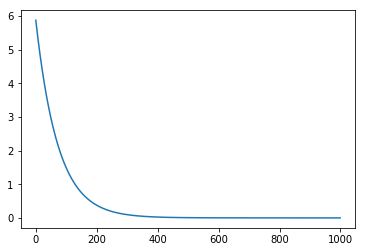

In [188]:
plt.plot(costs)

In [190]:
display(y.eval(), pred_y.eval())

array([3., 5.], dtype=float32)

array([3.0963287, 4.936286 ], dtype=float32)

- 옵티마이저 사용

In [196]:
X = tf.constant([1,2], dtype=tf.float32)
y = tf.constant([3,5], dtype=tf.float32)

w = tf.Variable(tf.random.normal([]))
b = tf.Variable(tf.random.normal([]))

pred_y = w*X + b
mse = tf.reduce_mean(tf.square(y-pred_y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train_op = optimizer.minimize(mse)

costs = []
tf.global_variables_initializer().run()

for i in range(500):
    sess.run(train_op)
    mse_val = mse.eval()
    costs.append(mse_val)
    if i%50==0: print(i, mse_val, w.eval(), b.eval())
        
print(i, mse_val, w.eval(), b.eval())

0 0.26128083 2.1295753 0.2986032
50 0.14690982 2.191027 0.34226298
100 0.08919033 2.233876 0.37438452
150 0.059952497 2.2635415 0.39831677
200 0.045035966 2.283864 0.41643435
250 0.03732164 2.2975678 0.43042082
300 0.033231106 2.3065834 0.44147006
350 0.030965155 2.3122807 0.45042863
400 0.029619526 2.3156302 0.45789662
450 0.0287395 2.3173206 0.4642997
499 0.028107889 2.3178372 0.46983293


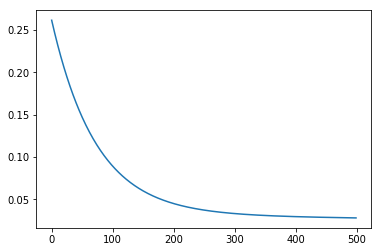

In [197]:
plt.plot(costs)

In [198]:
display(y.eval(), pred_y.eval())

array([3., 5.], dtype=float32)

array([2.7876701, 5.1055074], dtype=float32)